In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
# adding  folder up the stream
sys.path.insert(0, '../../')
import useful_functions as uf

# Analysis normalization of language tags for Europeana Translate

The goal of this notebook is to measure the amount of available data gained from normalizing the language tags of a recent (June2022) Europeana Data dump.
More info is in this [document](https://docs.google.com/document/d/19YMpv1zC6B2rN6twWL3JWOv-nA9gY3EtMdKQs4MQtFk/edit#).

# Functions definition

In [3]:
def data_fit(file,column_title,head,norm,collections=[]):
    '''This function  manipulates the statistical sheets produced by NTUA downloaded as csv files
    for analysis and visualization.
    Parameters
    file: name of the file to manipulate
    column_title: name of column to assign to the column that counts the number of literals
    header: from what row number to consider the original data
    collections (optional): list of collections to exclude, from the normalized stats sheet
    Ruturns
    Count_records: number of records (after removing the extra collections for the normalized dump)
    data_lang_tags: dataframe with number of literals per language''' 
    
    if norm:
        data_frame=pd.read_csv(file,sep=',',header=head,low_memory=False)
        data_lang_tags=data_frame.set_index('CollectionId')
        data_lang_tags=data_lang_tags.drop(collections)
        data_lang_tags=data_lang_tags.reset_index()
        data_lang_tags=data_lang_tags.loc[1:,:]
        data_lang_tags=data_lang_tags.sum(axis=0)
        data_lang_tags=pd.DataFrame(data_lang_tags)
        Count_records=data_lang_tags.loc['Count']
        data_lang_tags=data_lang_tags.iloc[3:]
        data_lang_tags=data_lang_tags.rename(columns={0:f"{column_title}"})  
    else:
        data_frame=pd.read_csv(file,sep=',',header=head,low_memory=False)
        data_lang_tags=data_frame.transpose()
        data_lang_tags=data_lang_tags[[0]]
        Count_records= data_lang_tags.iloc[2]
        data_lang_tags=data_lang_tags.iloc[3:,:]
        data_lang_tags=data_lang_tags.rename(columns={0:f"{column_title}"})
    return data_lang_tags, Count_records

# Data import

The data imported below are extracted from the statistical sheets  [here](https://docs.google.com/spreadsheets/d/1DVJip_Uk47d8HxmiUfcT5DOqfksQoU2IckjNi7nOp1I/edit#gid=127215813)  (normalized and unnormalized data dump).
The data are downloaded as csv files from google sheet and further structured for analysis and visualization.

In [4]:
# Files to be analized: stats before and aftern normalization
file_lang_tag='June_2022_beforenorm.csv'
file_lang_tag_norm='lang_tags_normalized.csv'

In [5]:
data_not_norm=pd.read_csv(file_lang_tag,low_memory=False,header=0)

In [6]:
data_norm=pd.read_csv(file_lang_tag_norm,low_memory=False,header=0)

In [7]:
data_not_norm.head(2)

,CollectionId,Source,Count,xx,hu,el,en,de,nl,cs,IS,sr,sk,fi,it,fr,es,lv,sl,pl,bg,et,pol,no,la,grc,sv,ru,pt,da,fin,IT,ltn,sw,ca,est,zxx,lt,und,eng,ja,uk,gr,ro,gl,he,RS,DE,RU,EN,PL,ko,zh,ar,th,id,fa,tr,hi,bn,ka,ur,ta,vi,tl,tw,lu,wa,br,si,kg,ie,sq,mk,ee,ch,is,ba,li,se,fra,ell,deu,ita,lat,nl-nl,en-gb,tir,gez,ha,slo,mmm,syr,sa,yi,hy,oc,frd,ota,frm,fro,km,grm,alt,co,pro,eu,te,hr,mul,nn,gre,cz,ms,cy,slk,ger,fre,jp,nb,hrv,spa,ces,srp,tur,bul,xxx,cu,eo,goh,rue,be,ang,kk,mn,ky,az,esx,ps,lo,cop,sog,gsw,dv,ug,egy,jrb,ml,chg,ae,mr,my,am,kho,ama,rm,ff,nog,non,bo,sd,arc,ga,sam,txg,kn,ku,jpr,gu,pa,jye,pi,nds,dum,gd,sco,Tegning,Skulptur,Maleri,aut,dsb,hsb,hun,epo,sla,nor,rus,ara,por,oci,ukr,fln,SI,nl-NL,en-GB,dit,all,jv,af,lav,swe,dut,chi,jpn,dan,el,cze,per,bre,gmh,ne,peo,slv,LA,FR,NL,akk,bra,rom,mehrspr,pra,new,urd,awa,sonst,na,val,cy-GB,nld,sk-SK,sk-sk,vrt,su,en-el,en-nl,en-fi,en-it,en-fr,en-hu,en-bg,en-es,en-pl,en-sl,en-de,en-ru,en-pt,en-la,en-et,en-da,en-sw,en-ca,en-lt,en-eng,en-ja,en-ro,en-PL,en-sv,en-ko,en-zh,en-cs,en-ar,en-th,en-fa,en-id,en-he,en-tr,en-hi,en-bn,en-ka,en-ur,en-ta,en-vi,en-tl,en-sr,en-li,en-sq,en-ha,en-slo,en-fro,en-lv,en-is,en-nn,en-ee,en-no,en-nb,en-grc,en-yi,en-mk,en-aut,en-mul,en-uk,en-sk,en-und,en-se,en-cy-GB,en-ga,en-vrt,en-su
0,NaN,NaN,54256533,42176741.0,1122877.0,503673.0,3314343.0,4713722.0,3501433.0,401148.0,1600.0,14703.0,14139.0,438416.0,1150303.0,1919045.0,808234.0,44753.0,92163.0,3800480.0,196627.0,570885.0,7748.0,288692.0,587695.0,10751.0,2075525.0,3431.0,169810.0,576539.0,23266.0,3266.0,19.0,40713.0,528872.0,38498.0,119005.0,287731.0,10100.0,293633.0,5430.0,1549.0,15.0,92694.0,19.0,4734.0,2.0,5.0,3.0,109.0,95.0,373.0,4078.0,6398.0,27.0,44.0,2399.0,141.0,85.0,31.0,96.0,36.0,294.0,212.0,25.0,2.0,2.0,1.0,61.0,2951.0,1.0,2.0,2069.0,84.0,69.0,24.0,3836.0,6.0,9.0,3491.0,118.0,2.0,130629.0,40630.0,502.0,901.0,882.0,1.0,106.0,1.0,1468.0,69.0,412.0,623.0,1790.0,545.0,42.0,1.0,1051.0,26.0,9.0,2.0,4.0,2.0,1.0,33.0,3129.0,10.0,853.0,3035.0,56.0,20278.0,1.0,21.0,2.0,471.0,81873.0,103152.0,1.0,486.0,2492.0,156.0,1.0,2.0,38.0,4.0,385.0,132.0,4.0,1.0,1.0,735.0,1.0,2.0,5.0,1.0,2.0,6.0,18.0,1.0,312.0,20.0,4.0,2.0,17.0,18.0,3.0,2.0,45.0,1.0,21.0,1.0,38.0,1.0,13.0,1.0,2.0,1.0,3.0,53.0,6.0,4.0,1130.0,47.0,3.0,2.0,16.0,6.0,17.0,4.0,1.0,46.0,3.0,2.0,17263.0,5389.0,1.0,1.0,1.0,1.0,1.0,2.0,126.0,1.0,1.0,4.0,8897.0,209.0,1.0,54.0,6.0,1.0,271.0,1000.0,979.0,1.0,22.0,1.0,1.0,1.0,2849.0,43.0,13.0,289.0,6.0,2.0,1.0,1.0,1.0,19.0,101.0,7.0,585.0,80.0,80.0,80.0,2.0,1.0,4.0,2.0,1.0,1.0,10.0,2.0,1.0,12.0,1.0,4.0,42981.0,48.0,789.0,1696.0,988.0,93957.0,47608.0,4284.0,20532.0,58407.0,112177.0,753.0,5583.0,31215.0,4301.0,89444.0,386.0,11886.0,1788.0,1606.0,10825.0,95.0,7714.0,772.0,12.0,1682.0,18910.0,1.0,13422.0,43.0,49.0,12057.0,55.0,24.0,44.0,40.0,341.0,34.0,23.0,18.0,25.0,22.0,25.0,36.0,23.0,1648.0,8.0,136.0,1.0,365.0,1.0,23.0,157.0,4.0,2.0,1015.0,10.0,1.0,4.0,12.0,1.0,10.0,2.0,535.0,2.0,2187.0,1.0,359.0,1620.0,867.0
1,10905,Aggregator: ASSETS Provider: Fondazione Luig...,15,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
data_norm.head(2)

,CollectionId,Source,Count,xx,pt,en,und,es,sr,sv,fr,nl,it,el,de,fi,is,pl,da,la,hu,cs,ro,sw,lt,ltn,no,tw,ru,bg,lu,wa,br,si,uk,id,kg,ie,sq,ca,mk,ee,ch,ar,th,ja,fa,tr,ba,et,fro,sl,grc,mul,RS,fln,li,hi,bn,ka,ur,ko,ta,zh,vi,tl,he,xxx,gl,hr,lv,zxx,eo,aut,be,sk,dsb,hsb,sla,oc,mmm,syr,sa,yi,hy,frd,ota,frm,km,grm,alt,co,pro,eu,te,ha,ti,gez,af,gd,sco,Tegning,Skulptur,Maleri,nn,jp,nb,cz,ps,lo,cop,sog,gsw,dv,ug,egy,jrb,ml,chg,ae,mr,ms,my,am,kho,ama,az,rm,ff,nog,non,bo,sd,arc,ga,sam,txg,kn,ku,jpr,gu,pa,cu,jye,pi,nds,dum,esx,gr,cy,dit,all,jv,akk,gmh,bra,rom,mehrspr,pra,new,awa,ne,sonst,peo,se,goh,rue,ang,kk,mn,ky,val,vrt,na,su,en-pt,en-es,en-it,en-fi,en-de,en-da,en-hu,en-cs,en-ro,en-pl,en-sw,en-el,en-ar,en-th,en-fr,en-nl,en-und,en-sl,en-ca,en-lt,en-li,en-hi,en-ru,en-bn,en-ka,en-id,en-ur,en-sv,en-ko,en-ta,en-zh,en-vi,en-ja,en-tl,en-fa,en-he,en-tr,en-la,en-bg,en-sq,en-aut,en-mul,en-lv,en-uk,en-sk,en-sr,en-mk,en-et,en-is,en-fro,en-ha,en-nn,en-no,en-nb,en-grc,en-ee,en-yi,en-cy,en-gr,en-oc,en-se,en-vrt,en-su,en-ga
0,NaN,NaN,54384823,42435640.0,170133.0,3611081.0,10100.0,808426.0,14705.0,2078340.0,2022431.0,3546416.0,1194177.0,524334.0,4928445.0,461761.0,5436.0,3808087.0,576546.0,588636.0,1123003.0,401150.0,92694.0,40713.0,287731.0,19.0,288696.0,2.0,12331.0,196631.0,2.0,1.0,62.0,3222.0,1555.0,44.0,1.0,2.0,2069.0,530140.0,84.0,69.0,24.0,6610.0,27.0,5719.0,2400.0,179.0,6.0,609383.0,9.0,94263.0,10751.0,3035.0,2.0,1.0,9.0,85.0,31.0,96.0,46.0,373.0,294.0,4091.0,212.0,25.0,4734.0,385.0,19.0,3345.0,44754.0,119014.0,5.0,1.0,735.0,16915.0,1.0,2.0,1.0,96.0,69.0,412.0,623.0,1790.0,545.0,1.0,1051.0,26.0,2.0,4.0,2.0,1.0,33.0,3129.0,10.0,1.0,1.0,106.0,1.0,17263.0,5389.0,1.0,1.0,1.0,56.0,1.0,486.0,1.0,18.0,1.0,312.0,20.0,4.0,2.0,17.0,18.0,3.0,2.0,45.0,1.0,21.0,21.0,1.0,38.0,1.0,13.0,2.0,1.0,2.0,1.0,3.0,53.0,6.0,4.0,1130.0,47.0,3.0,2.0,16.0,6.0,17.0,4.0,132.0,1.0,46.0,3.0,2.0,6.0,15.0,6.0,1.0,22.0,1.0,2.0,19.0,1.0,4.0,2.0,1.0,1.0,2.0,101.0,1.0,7.0,3491.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1696.0,12.0,988.0,11886.0,5640.0,20544.0,4284.0,89602.0,10825.0,112263.0,12057.0,18910.0,34264.0,95.0,94170.0,55.0,24.0,58796.0,49226.0,44.0,4310.0,7920.0,772.0,8.0,23.0,591.0,18.0,25.0,40.0,22.0,13422.0,43.0,25.0,49.0,36.0,1682.0,23.0,44.0,341.0,35.0,1788.0,753.0,136.0,1.0,10.0,23.0,6.0,948.0,1648.0,12.0,1606.0,261.0,1.0,1.0,4.0,1015.0,10.0,1.0,2.0,4.0,1.0,1.0,2.0,2187.0,1620.0,867.0,359.0
1,2048602,Aggregator: DM2E Provider: Österreichische N...,175,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Difference in number of records and collections between not normalized and  normalized Europeana dump from June 2022

In [9]:
# difference total number of records between the two dumps
data_norm.Count.loc[0]-data_not_norm.Count.loc[0]

128290

This the difference in number of records, the new normalized data dump contain more records and this is not expected because the normalization should not affect the number of records.

In [10]:
data_norm.head(2)

,CollectionId,Source,Count,xx,pt,en,und,es,sr,sv,fr,nl,it,el,de,fi,is,pl,da,la,hu,cs,ro,sw,lt,ltn,no,tw,ru,bg,lu,wa,br,si,uk,id,kg,ie,sq,ca,mk,ee,ch,ar,th,ja,fa,tr,ba,et,fro,sl,grc,mul,RS,fln,li,hi,bn,ka,ur,ko,ta,zh,vi,tl,he,xxx,gl,hr,lv,zxx,eo,aut,be,sk,dsb,hsb,sla,oc,mmm,syr,sa,yi,hy,frd,ota,frm,km,grm,alt,co,pro,eu,te,ha,ti,gez,af,gd,sco,Tegning,Skulptur,Maleri,nn,jp,nb,cz,ps,lo,cop,sog,gsw,dv,ug,egy,jrb,ml,chg,ae,mr,ms,my,am,kho,ama,az,rm,ff,nog,non,bo,sd,arc,ga,sam,txg,kn,ku,jpr,gu,pa,cu,jye,pi,nds,dum,esx,gr,cy,dit,all,jv,akk,gmh,bra,rom,mehrspr,pra,new,awa,ne,sonst,peo,se,goh,rue,ang,kk,mn,ky,val,vrt,na,su,en-pt,en-es,en-it,en-fi,en-de,en-da,en-hu,en-cs,en-ro,en-pl,en-sw,en-el,en-ar,en-th,en-fr,en-nl,en-und,en-sl,en-ca,en-lt,en-li,en-hi,en-ru,en-bn,en-ka,en-id,en-ur,en-sv,en-ko,en-ta,en-zh,en-vi,en-ja,en-tl,en-fa,en-he,en-tr,en-la,en-bg,en-sq,en-aut,en-mul,en-lv,en-uk,en-sk,en-sr,en-mk,en-et,en-is,en-fro,en-ha,en-nn,en-no,en-nb,en-grc,en-ee,en-yi,en-cy,en-gr,en-oc,en-se,en-vrt,en-su,en-ga
0,NaN,NaN,54384823,42435640.0,170133.0,3611081.0,10100.0,808426.0,14705.0,2078340.0,2022431.0,3546416.0,1194177.0,524334.0,4928445.0,461761.0,5436.0,3808087.0,576546.0,588636.0,1123003.0,401150.0,92694.0,40713.0,287731.0,19.0,288696.0,2.0,12331.0,196631.0,2.0,1.0,62.0,3222.0,1555.0,44.0,1.0,2.0,2069.0,530140.0,84.0,69.0,24.0,6610.0,27.0,5719.0,2400.0,179.0,6.0,609383.0,9.0,94263.0,10751.0,3035.0,2.0,1.0,9.0,85.0,31.0,96.0,46.0,373.0,294.0,4091.0,212.0,25.0,4734.0,385.0,19.0,3345.0,44754.0,119014.0,5.0,1.0,735.0,16915.0,1.0,2.0,1.0,96.0,69.0,412.0,623.0,1790.0,545.0,1.0,1051.0,26.0,2.0,4.0,2.0,1.0,33.0,3129.0,10.0,1.0,1.0,106.0,1.0,17263.0,5389.0,1.0,1.0,1.0,56.0,1.0,486.0,1.0,18.0,1.0,312.0,20.0,4.0,2.0,17.0,18.0,3.0,2.0,45.0,1.0,21.0,21.0,1.0,38.0,1.0,13.0,2.0,1.0,2.0,1.0,3.0,53.0,6.0,4.0,1130.0,47.0,3.0,2.0,16.0,6.0,17.0,4.0,132.0,1.0,46.0,3.0,2.0,6.0,15.0,6.0,1.0,22.0,1.0,2.0,19.0,1.0,4.0,2.0,1.0,1.0,2.0,101.0,1.0,7.0,3491.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1696.0,12.0,988.0,11886.0,5640.0,20544.0,4284.0,89602.0,10825.0,112263.0,12057.0,18910.0,34264.0,95.0,94170.0,55.0,24.0,58796.0,49226.0,44.0,4310.0,7920.0,772.0,8.0,23.0,591.0,18.0,25.0,40.0,22.0,13422.0,43.0,25.0,49.0,36.0,1682.0,23.0,44.0,341.0,35.0,1788.0,753.0,136.0,1.0,10.0,23.0,6.0,948.0,1648.0,12.0,1606.0,261.0,1.0,1.0,4.0,1015.0,10.0,1.0,2.0,4.0,1.0,1.0,2.0,2187.0,1620.0,867.0,359.0
1,2048602,Aggregator: DM2E Provider: Österreichische N...,175,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# difference in collections
set_not_norm=set(data_not_norm.CollectionId.dropna())
set_norm=set(data_norm.CollectionId.dropna())

In [12]:
len(set_norm)

2071

In [13]:
len(data_norm.CollectionId)

2090

In [14]:
len(set_not_norm.difference(set_norm))

0

In [15]:
set_norm.difference(set_not_norm)

{'11630',
 '192',
 '2021005',
 '2058621',
 '2058637',
 '2063624',
 '2064919',
 '307',
 '324',
 '541',
 '575',
 '630',
 '707',
 '759',
 '8574',
 '8641',
 '916103',
 '919178',
 '919199',
 '9200292',
 '92068'}

These are the extra collections that are present in the normalized stats but not in the unnormalized stats.

In [16]:
extracollections=list(set_norm.difference(set_not_norm))

In [17]:
df_norm_new_index=data_norm.set_index('CollectionId')

In [18]:
count=[]
for i in extracollections:
    c=df_norm_new_index.loc[str(i)].Count
    count.append(c)

In [19]:
np.sum(count)

128290

In [20]:
len(set_not_norm)

2050

In [21]:
len(set(set_norm))

2071

- The normalized dump contain 21 more collections than the  not normalized one 
- The normalized dump contains 128290 more records than the old one
- All collections in the not normalized dump are also in the normalized dump
- There are 21 collections in the normalized dump which are not in the unnormalized  dump and they account for the 128290 extra records.

To compensate I remove those 21 collections from the normalized data dump.

In [22]:
datalangs,records_new=data_fit(file_lang_tag,column_title="nr_literals",head=0,norm=False)
records_new #number of records unnormalized dump

0    54256533
Name: Count, dtype: object

In [23]:
datalangs_norm, records_norm =data_fit(file_lang_tag_norm,column_title="nr_literals_norm",head=0,norm=True,collections=extracollections)
records_norm # number of records in normalized dump after removing the extra collections

0    54256533
Name: Count, dtype: object

After removing the 21 collections the two dumps contain the same number of records and can be more easily compared to extract the impact of normalization. This can be seen comparing the `Count` variable in both dataframes.

# Impact normalization on number of fields

In [24]:
len(datalangs_norm)

236

In [25]:
len(datalangs)

295

The normalized dump contains a smaller number of  language fields and this should be expected because the language tags have been compacted.

# Conversion normalized and not normalized data to dictionaries

In [26]:
# Converting not normalized data to dictionary
dictionary_lang = dict(zip(datalangs.index, datalangs.nr_literals))
#original file contains an lang tag fr-en, here I manually change it to en-fr to be in line with the rest
#dictionary_lang['en-fr'] = dictionary_lang.pop('fr-en')

In [27]:
# Converting normalized data to dictionary
dictionary_lang_norm = dict(zip(datalangs_norm.index, datalangs_norm.nr_literals_norm))

# Focus on official european languages

In [28]:
#Here I focus on the 24 languages
lg_iso_24={"bulgarian":"bg", "croatian":"hr", "czech":"cs","danish":"da", "dutch":"nl", "english":"en","estonian":"et",
 "finnish":"fi","french":"fr", "german":"de", "greek":"el","hungarian":"hu", "irish":"ga","italian":"it",
 "latvian":"lv","lithuanian":"lt","maltese":"mt","polish":"pl", "portoghese":"pt","romanian":"ro", 
 "slovak":"sk","slovenian":"sl", "spanish":"es", "swedish":"sv"}

In [29]:
#normalization monlingual data focused on the 24 languages
dictlang_norm_monoling_24={}
for tag in lg_iso_24.values(): 
    if tag in dictionary_lang_norm:
        dictlang_norm_monoling_24[tag]=dictionary_lang_norm[tag]
    else:
        dictlang_norm_monoling_24[tag]=0

dictlang_norm_monoling_24 

{'bg': 196631.0,
 'hr': 3345.0,
 'cs': 401150.0,
 'da': 576545.0,
 'nl': 3546416.0,
 'en': 3609900.0,
 'et': 609383.0,
 'fi': 461682.0,
 'fr': 2022394.0,
 'de': 4926226.0,
 'el': 523955.0,
 'hu': 1123003.0,
 'ga': 1130.0,
 'it': 1194177.0,
 'lv': 44754.0,
 'lt': 287731.0,
 'mt': 0,
 'pl': 3808087.0,
 'pt': 169811.0,
 'ro': 92694.0,
 'sk': 16915.0,
 'sl': 92748.0,
 'es': 808390.0,
 'sv': 2078340.0}

## Normalized monolingual and bilingual literals

In [30]:
df_monoling_norm=pd.DataFrame.from_dict(dictlang_norm_monoling_24, orient = 'index')
df_monoling_norm=df_monoling_norm.rename(columns={0:"nr_literals_monling_norm"})

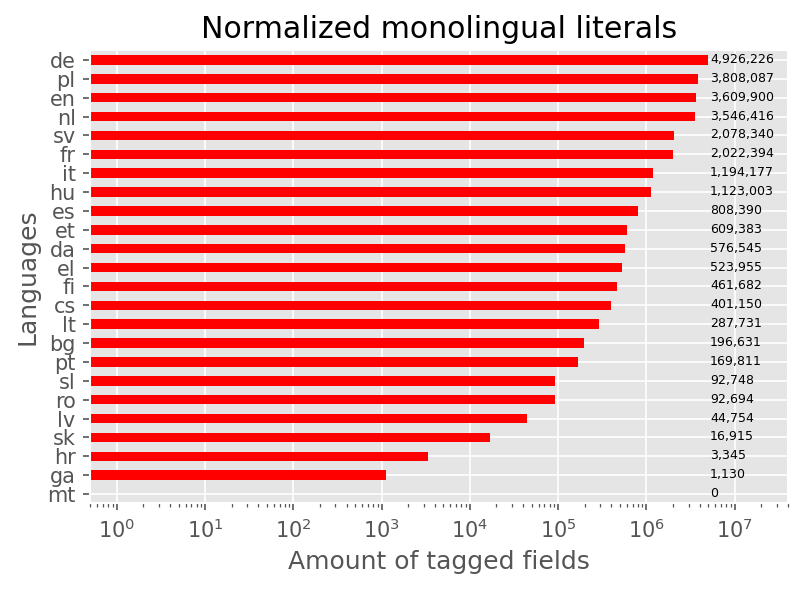

In [31]:
uf.plot_tot_barh_numbers(df_monoling_norm.nr_literals_monling_norm.apply(int).sort_values( ascending=True),title='Normalized monolingual literals',\
                         name_file= 'monolingual',slide_label=0.15,segments_label=True,save=False)

In [32]:
dictlang_norm_biling_24={}
for key in lg_iso_24:
    if f"en-{lg_iso_24[key]}" in dictionary_lang_norm:
        dictlang_norm_biling_24[f"en-{lg_iso_24[key]}"]=dictionary_lang_norm[f"en-{lg_iso_24[key]}"]
    else:
        dictlang_norm_biling_24[f"en-{lg_iso_24[key]}"]=0

In [33]:
dictlang_norm_biling_24

{'en-bg': 753.0,
 'en-hr': 0,
 'en-cs': 12057.0,
 'en-da': 10825.0,
 'en-nl': 49226.0,
 'en-en': 0,
 'en-et': 1606.0,
 'en-fi': 4284.0,
 'en-fr': 58796.0,
 'en-de': 89600.0,
 'en-el': 93957.0,
 'en-hu': 112263.0,
 'en-ga': 359.0,
 'en-it': 20544.0,
 'en-lv': 23.0,
 'en-lt': 772.0,
 'en-mt': 0,
 'en-pl': 34264.0,
 'en-pt': 11886.0,
 'en-ro': 18910.0,
 'en-sk': 948.0,
 'en-sl': 4301.0,
 'en-es': 5640.0,
 'en-sv': 13422.0}

In [34]:
dictlang_norm_biling_24.pop('en-en')

0

In [35]:
dictlang_norm_biling_24

{'en-bg': 753.0,
 'en-hr': 0,
 'en-cs': 12057.0,
 'en-da': 10825.0,
 'en-nl': 49226.0,
 'en-et': 1606.0,
 'en-fi': 4284.0,
 'en-fr': 58796.0,
 'en-de': 89600.0,
 'en-el': 93957.0,
 'en-hu': 112263.0,
 'en-ga': 359.0,
 'en-it': 20544.0,
 'en-lv': 23.0,
 'en-lt': 772.0,
 'en-mt': 0,
 'en-pl': 34264.0,
 'en-pt': 11886.0,
 'en-ro': 18910.0,
 'en-sk': 948.0,
 'en-sl': 4301.0,
 'en-es': 5640.0,
 'en-sv': 13422.0}

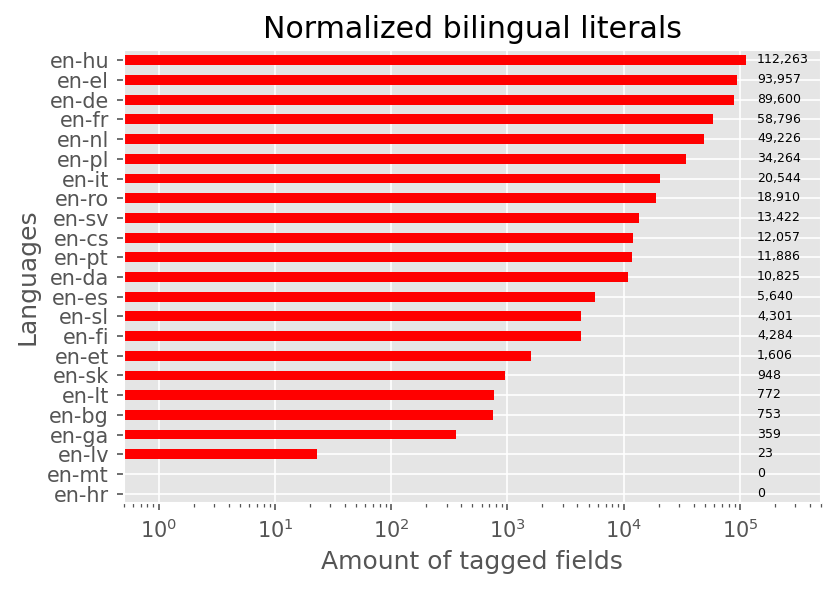

In [36]:
df_biling_norm=pd.DataFrame.from_dict(dictlang_norm_biling_24, orient = 'index')
df_biling_norm=df_biling_norm.rename(columns={0:"nr_literals_biling_norm"})
uf.plot_tot_barh_numbers(df_biling_norm.nr_literals_biling_norm.apply(int).sort_values(ascending=True),title='Normalized bilingual literals',\
                        name_file= 'bilingual', x_lim=0.5e6,slide_label=0.004,segments_label=True,save=False)

In [37]:
df_biling_norm.sort_values(by="nr_literals_biling_norm", ascending=False).transpose()

,en-hu,en-el,en-de,en-fr,en-nl,en-pl,en-it,en-ro,en-sv,en-cs,en-pt,en-da,en-es,en-sl,en-fi,en-et,en-sk,en-lt,en-bg,en-ga,en-lv,en-mt,en-hr
nr_literals_biling_norm,112263.0,93957.0,89600.0,58796.0,49226.0,34264.0,20544.0,18910.0,13422.0,12057.0,11886.0,10825.0,5640.0,4301.0,4284.0,1606.0,948.0,772.0,753.0,359.0,23.0,0.0,0.0


# Gain of normalization on monolingual and bilingual fields

In [38]:
#Here I calculate the differnce in #literals between the two versions of the total file.
# I calculate the increment in the nr of normalized tags with respect to the previous version
new_dict_tot={}
for tag in dictionary_lang_norm:
    if tag in dictionary_lang:
            new_dict_tot[tag]  = int(dictionary_lang_norm[tag])- int(dictionary_lang[tag] )        

In [39]:
#Here I calculate the new situation with the normalized tags for the bilinguals for the 24 languages
new_dict_bili={}
for key in lg_iso_24: 
    if f"en-{lg_iso_24[key]}" in new_dict_tot:
        new_dict_bili[f"en-{lg_iso_24[key]}"]=new_dict_tot[f"en-{lg_iso_24[key]}"]
    else:
        new_dict_bili[f"en-{lg_iso_24[key]}"]=0

In [40]:
#Here I calculate the new situation with the normalized tags for monlingual
new_dict_mono={}
for tag in lg_iso_24.values():
        if tag in dictionary_lang_norm and dictionary_lang :
            new_dict_mono[tag]  = int(dictionary_lang_norm[tag])-int(dictionary_lang[tag])
        else:
            new_dict_mono[tag]=0

## Monolingual

In [41]:
df_monoling_gain=pd.DataFrame.from_dict(new_dict_mono, orient = 'index')
df_monoling_gain=df_monoling_gain.rename(columns={0:"gain_nr_literals"})

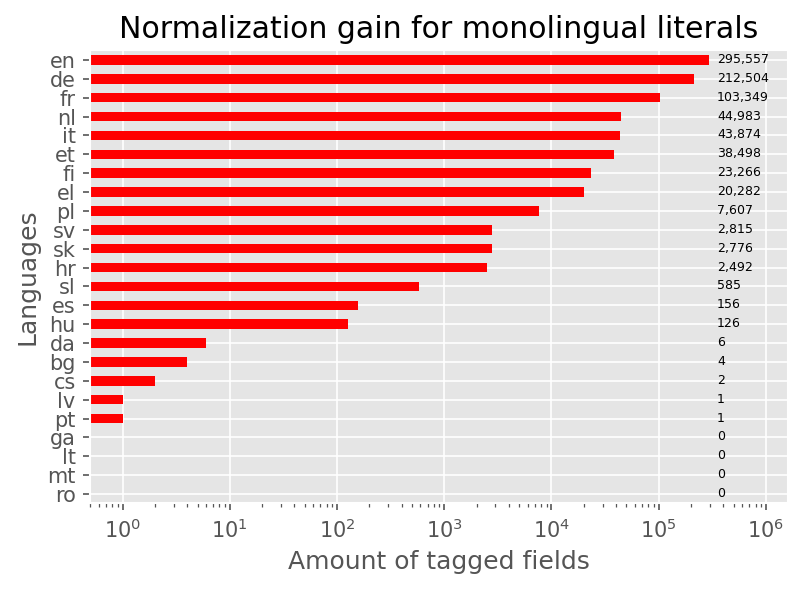

In [42]:
uf.plot_tot_barh_numbers(df_monoling_gain.gain_nr_literals.apply(int).sort_values(ascending=True),title='Normalization gain for monolingual literals',\
                        name_file= 'gain_monolingual', x_lim=1.6e6,slide_label=0.01,segments_label=True,save=False)

In [48]:
df_monoling_gain.gain_nr_literals.apply(int).sort_values(ascending=False)

en    295557
de    212504
fr    103349
nl     44983
it     43874
et     38498
fi     23266
el     20282
pl      7607
sv      2815
sk      2776
hr      2492
sl       585
es       156
hu       126
da         6
bg         4
cs         2
pt         1
lv         1
mt         0
ro         0
lt         0
ga         0
Name: gain_nr_literals, dtype: int64

## Bilingual

In [43]:
df_biling_gain=pd.DataFrame.from_dict(new_dict_bili, orient = 'index')
df_biling_gain=df_biling_gain.rename(columns={0:"gain_nr_literals"})

In [44]:
df_biling_gain=df_biling_gain.drop('en-en')

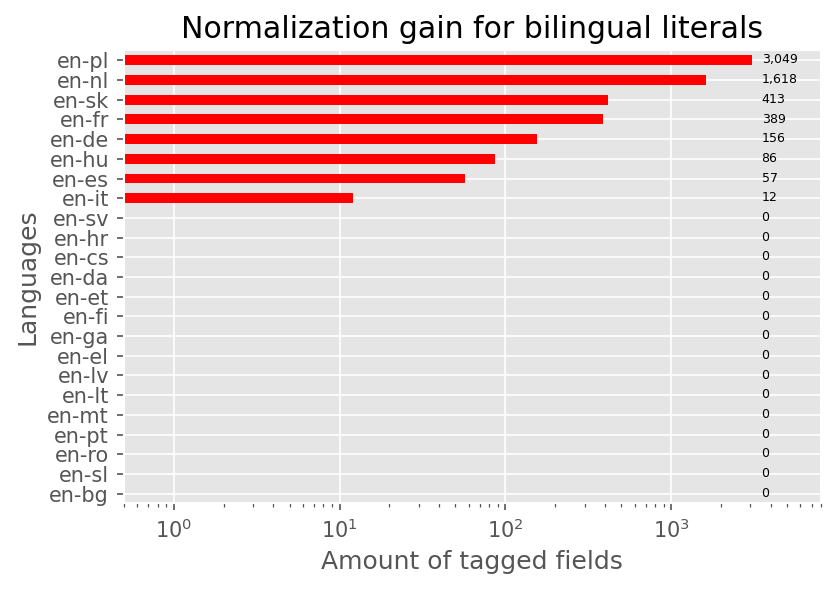

In [45]:
uf.plot_tot_barh_numbers(df_biling_gain.gain_nr_literals.apply(int).sort_values(ascending=True),title='Normalization gain for bilingual literals',\
                        name_file= 'gain_bilingual', x_lim=0.8e4,slide_label=1e-4,segments_label=True,save=False)

In [46]:
df_biling=df_biling_gain.sort_values(by="gain_nr_literals", ascending=False)
df_biling

,gain_nr_literals
en-pl,3049
en-nl,1618
en-sk,413
en-fr,389
en-de,156
en-hu,86
en-es,57
en-it,12
en-bg,0
en-lt,0


 # Conclusions


- There is improvement in terms of amount of language data produced by normalization both for monolingual and bilingual literals. 
 - There is a surplus of 21 collections and number of records in the normalized sheet stas. This is not expected and it woulbe valuable to understand where it comes from